<a href="https://colab.research.google.com/github/KHALID-SARFRAZ/Data-Science-Internship/blob/main/Task2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


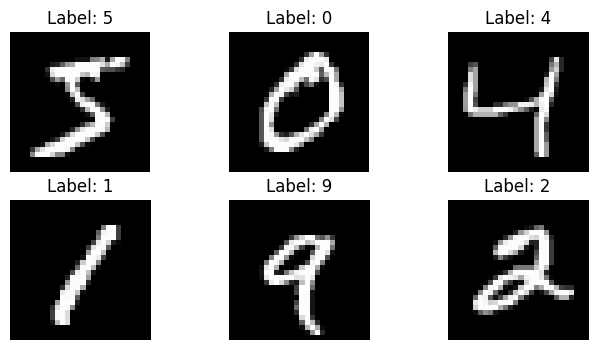

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize to 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Preview some images
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [3]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8511 - loss: 0.5081 - val_accuracy: 0.9637 - val_loss: 0.1316
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9532 - loss: 0.1613 - val_accuracy: 0.9720 - val_loss: 0.1024
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9649 - loss: 0.1154 - val_accuracy: 0.9767 - val_loss: 0.0781
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9722 - loss: 0.0891 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9759 - loss: 0.0763 - val_accuracy: 0.9805 - val_loss: 0.0706


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0847

Test Accuracy: 0.9764


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


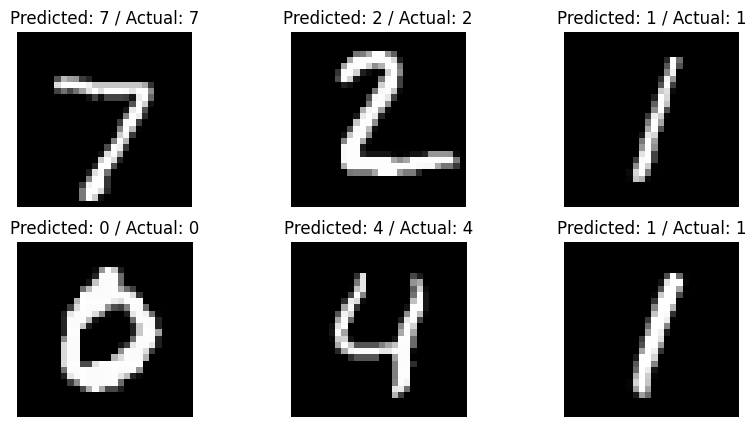

In [7]:
predictions = model.predict(x_test)

# Show some predictions
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} / Actual: {y_test[i]}")
    plt.axis('off')
plt.show()
